<a href="https://colab.research.google.com/github/Jay-Lim-png/ADP_Study/blob/master/%EC%9E%84%EC%A7%80%EC%97%B0_%EC%A0%84%EC%B2%98%EB%A6%AC_%EC%BD%94%EB%93%9C(1%EC%A3%BC%EC%B0%A8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#패키지 불러오기
import io
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('./MyDrive')

Mounted at ./MyDrive


In [ ]:
cd MyDrive/My\ Drive

/content/MyDrive/My Drive


In [ ]:
df1 = pd.read_csv('/content/MyDrive/MyDrive/data/bigdatakisa2021/0425/daily-website-visitors.csv')
df1.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


## 문제 목록

1) daily-website-visitors.csv 파일을 로딩하여 기본적인 데이터 타입을 확인하시오  

2) Date, Page.Loads, Unique.Visits, First.Time.Visits, Returning.Visits 열만 추출해서 output.csv 라는 파일로 저장하시오.   

3) 모든 열의 이름을 소문자로 변경하고 점(.)을 언더바(_)로 변경하시오.  

4) date라는 열은 날짜형으로 변경하고, 나머지는 수치형으로 변경하시오.  

5) NA인 값들은 모두 평균으로 대체하시오.  

6) date열에서 년, 월, 일, 요일을 각 변수로 추출하시오.  

7) X축을 시간으로 두고, Y축을 4개의 수치형 변수를 점 그래프, 라인 차트로 표현하시오.  

8) Returning.Visits 열을 4분위수로 가장 작은 숫자 순으로 A(하위 25%), B(50%), C(75%), D(100%)로 범주형으로 변환하고 Grade라는 변수명을 생성하시오. (기존 Returning.Visits 은 그대로 둘 것)  

9) 4개의 수치형 데이터가 각 요일별로 상이한지를 BoxPlot 을 그려서 시각화 하시오.    
제출파일은 본인이름(예시 홍길동)을 이용하여 본인 폴더에 제출  
홍길동_output.csv, 홍길동_전처리.R, 홍길동_전처리.pdf (또는 DOC) 

##1) daily-website-visitors.csv 파일을 로딩하여 기본적인 데이터 타입을 확인하시오

 Row를 제외하고 총 1개의 정수형 타입 칼럼, 5개의 문자형 타입 칼럼이 있음
 여기서 Day.Of.Week는 datetime으로, Page.Loads~Returning.Visits의 4개 칼럼은 정수형으로 변경 필요

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   object
 5   Unique.Visits      2167 non-null   object
 6   First.Time.Visits  2167 non-null   object
 7   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB


In [ ]:
## row는 필요 없기 떄문에 drop함
df1.drop({'Row'}, axis = 1, inplace = True)

## 2) Date, Page.Loads, Unique.Visits, First.Time.Visits, Returning.Visits 열만 추출해서 output.csv 라는 파일로 저장하시오.

In [ ]:
df1[['Date', 'Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']].to_csv('output.csv', index= False)

##3) 모든 열의 이름을 소문자로 변경하고 점(.)을 언더바(_)로 변경하시오.

In [ ]:
df1.rename(columns = {'Day':'day', 'Day.Of.Week':'day_of_week', 'Date':'date', 'Page.Loads':'page_loads', 'Unique.Visits':'unique_visits', 
                      'First.Time.Visits':'first_time_visits', 'Returning.Visits':'returning_visits'}, inplace = True)

##4) date라는 열은 날짜형으로 변경하고, 나머지는 수치형으로 변경하시오.

In [ ]:
df1['date'] = pd.to_datetime(df1.date, format = "%m/%d/%Y")

In [ ]:
## 숫자형 변수들의 object 타입 변경
df1['page_loads'] = df1['page_loads'].str.replace(',', '').astype('int64')
df1['unique_visits'] = df1['unique_visits'].str.replace(',', '').astype('int64')
df1['first_time_visits'] = df1['first_time_visits'].str.replace(',', '').astype('int64')
df1['returning_visits'] = df1['returning_visits'].str.replace(',', '').astype('int64')

##5) NA인 값들은 모두 평균으로 대체하시오.

In [ ]:
## info함수를 사용했을 때 결측값 없는 것으로 확인

##6) date열에서 년, 월, 일, 요일을 각 변수로 추출하시오.

In [ ]:
df1['year'] = pd.DatetimeIndex(df1['date']).year
df1['month'] = pd.DatetimeIndex(df1['date']).month
df1['dayy'] = pd.DatetimeIndex(df1['date']).day

##7) X축을 시간으로 두고, Y축을 4개의 수치형 변수를 점 그래프, 라인 차트로 표현하시오.

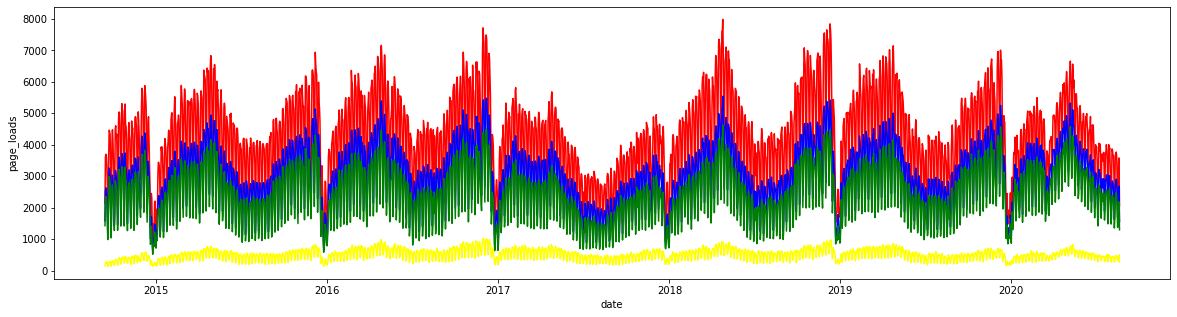

In [ ]:
## 방문자 수 시각화
plt.figure(figsize=(20,5)) 
sns.lineplot(x='date', y = 'page_loads', data = df1, color = 'red')
sns.lineplot(x = 'date', y = 'unique_visits', data = df1, color = 'blue')
sns.lineplot(x = 'date', y = 'first_time_visits', data = df1, color = 'green')
sns.lineplot(x = 'date', y = 'returning_visits', data = df1, color = 'yellow')
plt.show()

## 8) Returning.Visits 열을 4분위수로 가장 작은 숫자 순으로 A(하위 25%), B(50%), C(75%), D(100%)로 범주형으로 변환하고 Grade라는 변수명을 생성하시오. (기존 Returning.Visits 은 그대로 둘 것)

In [ ]:
df1['Grade'] = pd.qcut(df1.returning_visits, q = 4, labels = ['A', 'B', 'C', 'D'])

# 제대로 나뉘었는지 확인
df1[['Grade', 'returning_visits']].groupby(['Grade']).mean()

,returning_visits
Grade,
A,295.450185
B,455.262774
C,567.332710
D,730.586716


##9) 4개의 수치형 데이터가 각 요일별로 상이한지를 BoxPlot 을 그려서 시각화 하시오.
제출파일은 본인이름(예시 홍길동)을 이용하여 본인 폴더에 제출
홍길동_output.csv, 홍길동_전처리.R, 홍길동_전처리.pdf (또는 DOC)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_

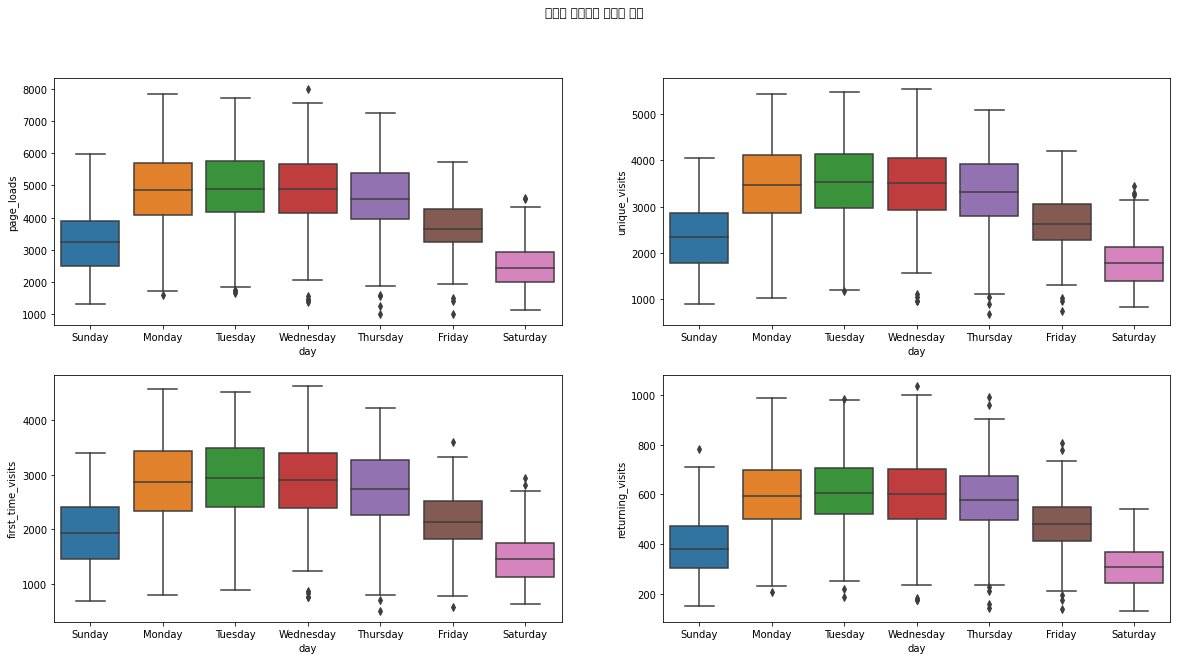

In [ ]:
fig, axes = plt.subplots(2,2, figsize = (20,10))
fig.suptitle('수치형 데이터의 요일별 차이')
sns.boxplot(x = 'day', y = 'page_loads', data = df1, ax = axes[0,0])
sns.boxplot(x = 'day', y = 'unique_visits', data = df1, ax = axes[0,1])
sns.boxplot(x = 'day', y = 'first_time_visits', data = df1, ax = axes[1,0])
sns.boxplot(x = 'day', y = 'returning_visits', data = df1, ax = axes[1,1])
